In [2]:
# Use et2 for compatibility
from kuibit.simdir import SimDir
import kuibit.visualize_matplotlib as viz
import matplotlib.pyplot as plt
import numpy as np

In [1]:
def z_i(sim, i):
    '''go from iteration number to redshift''' # use the timeseries of gxx to go grom iter to scale factor

    gxx = sim.timeseries.average['gxx']
    a = np.sqrt(gxx.y[i])
    z = 1/a - 1                                 # Assume a_IN = 1
    return z

# Validate!!   

In [ ]:
sim = SimDir('/home/jorge/Downloads/output-0000/testPert')             # MSI path
#sim = SimDir('')                                                       # I don't have enough space her :(
print(sim)

Indexed 22 files and 1 subdirectories
Folder /home/jorge/Downloads/output-0000/testPert
/home/jorge/Downloads/output-0000/testPert
Available scalar timeseries:
[]

Available minimum timeseries:
[]

Available maximum timeseries:
[]

Available norm1 timeseries:
[]

Available norm2 timeseries:
[]

Available average timeseries:
['kxx', 'kxy', 'kxz', 'kyy', 'kyz', 'kzz', 'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 'alp', 'H', 'rho', 'betax', 'betay', 'betaz', 'M1', 'M2', 'M3']
Variables available: dict_keys([])

Available grid data of dimension 1D (x): 
[]


Available grid data of dimension 1D (y): 
[]


Available grid data of dimension 1D (z): 
[]


Available grid data of dimension 2D (xy): 
[]


Available grid data of dimension 2D (xz): 
[]


Available grid data of dimension 2D (yz): 
[]


Available grid data of dimension 3D (xyz): 
['kxx', 'kxy', 'kxz', 'kyy', 'kyz', 'kzz', 'NaNmask', 'rho', 'gxx', 'gxy', 'gxz', 'gyy', 'gyz', 'gzz', 'grid_coordinates', 'grid_structure']
No horizon found
Ti

In [4]:
kxx = sim.gf.xyz['kxx']
print(f'{kxx.available_iterations[:3]} ... {kxx.available_iterations[-3:]}')

[0, 20, 40] ... [3180, 3200, 3220]


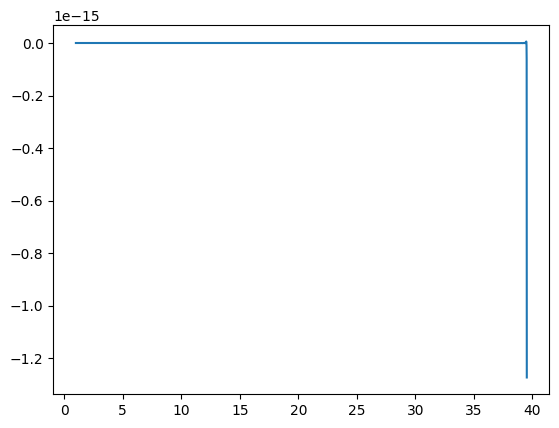

In [8]:
M1 = sim.timeseries.average['M1']
M2 = sim.timeseries.average['M2']
M3 = sim.timeseries.average['M3']
plt.plot(M1) 

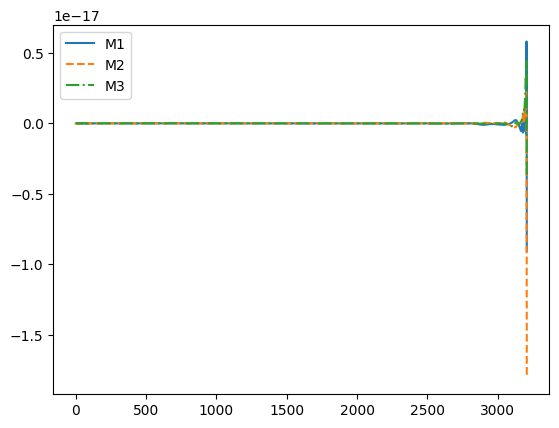

In [16]:
li=12
plt.plot(M1.y[:-li], label='M1')
plt.plot(M3.y[:-li],label='M2', linestyle='--' )
plt.plot(M2.y[:-li], label='M3', linestyle='-.')
plt.legend()

In [2]:
rho_avg = sim.ts.average['rho']
plt.plot(rho_avg)

NameError: name 'sim' is not defined

# Grid functions

- $\rho$

- $g_{ij}$

- $K_{ij}$

In [17]:
k = [sim.gf.xyz[f'k{i}'] for i in ['xx', 'xy', 'xz', 'yy', 'yz', 'zz']]

In [22]:
kxx = k[0]
kxx[0]              # first iteration

In [ ]:
def plot_k(comp, i, z):
    slice = k[comp][i][0][0][:, :, z]
    plt.imshow(slice, origin="lower", cmap="inferno")
    plt.colorbar(label='k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'k{comp} | iteration = {i} | z={z}')

# No labels, for subplot
def plot_k_clean(comp, i, z):
    slice = k[comp][i][0][0][:, :, z]
    plt.imshow(slice, origin="lower", cmap="inferno")
    plt.colorbar(shrink=.5)
    #plt.xlabel('x')
    #plt.ylabel('y')
    redshift = 
    plt.title(f'k{comp} | it{i} | z{redshift} | z_lev{z}')    

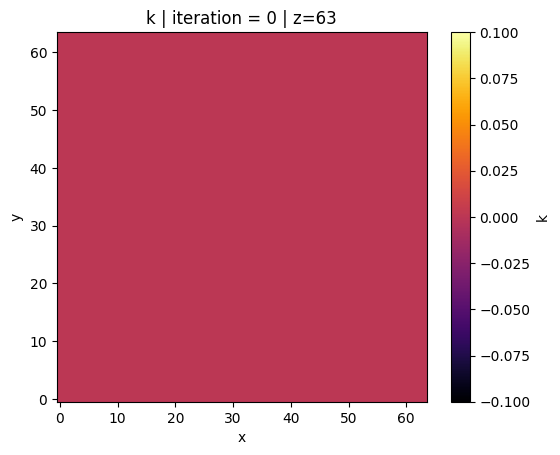

In [ ]:
plot_k(1,0,63)              # 1 -> kxy

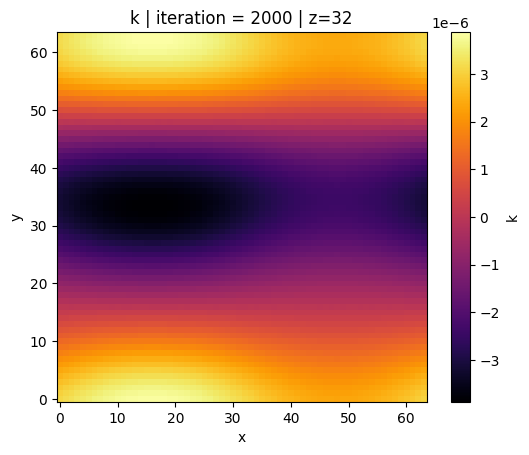

In [ ]:
plot_k(2,0,32)                  # No crossterms, at least in the 1st iteration

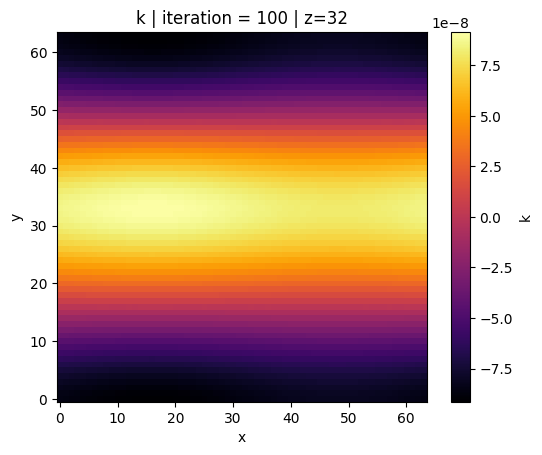

In [ ]:
plot_k(2,100,32)                # Some cross terms

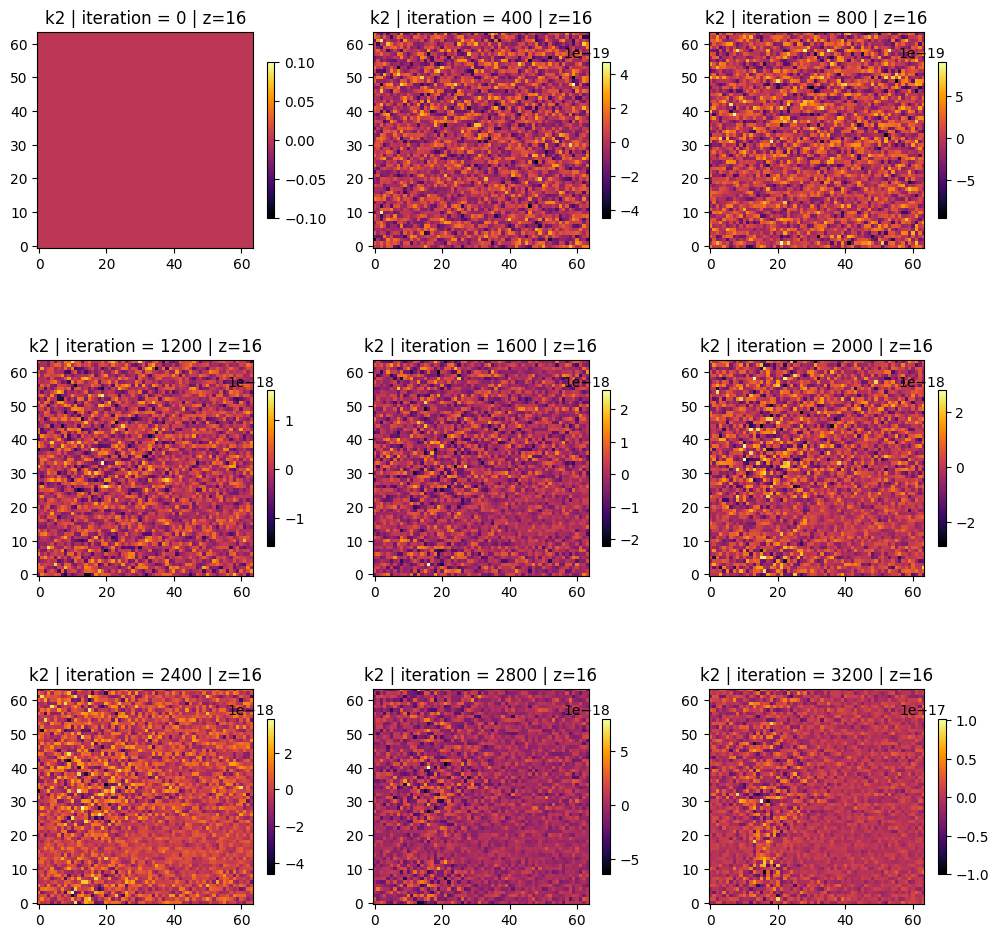

In [61]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plot_k_clean(2,400*i,16)                # 2 -> kxz; iteration ; z_level (L/4)

plt.tight_layout()

# Contrasts and 1st-order projections